# Vectors, Matrices, Linear Algebra

In [1]:
from sympy.interactive.printing import init_printing
from sympy import *
import numpy as np 
init_printing(use_unicode=True)


## Objectives:
* Manipulate vectors and matrices
* Solve some linear algebra problems 

## 1.1 Vectors

In [2]:
u = np.array([-1, 2, 3])
v = np.array([1, 2 , 3])
print(u+v)

[0 4 6]


In [3]:
print(u-v)

[-2  0  0]


* Element wise product between two vectors

In [4]:
# elements wise product 
u*v

array([-1,  4,  9])

* dot product

In [5]:
# dot products
np.dot(u,v)

* cross product

In [6]:
np.cross(u, v)

array([ 0,  6, -4])

## 1.2 Matrices

In [7]:
M = Matrix([[1,2],[3,4]])
M

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

In [8]:
i, j = symbols('i, j') 

def f(i, j):
    return i**2+j**2

M1 = Matrix(2, 4, f)
M1

⎡0  1  4  9 ⎤
⎢           ⎥
⎣1  2  5  10⎦

In [9]:
print('Cols and Rows of M1 matrix are {} and {}'.format(M1.cols, M1.rows))
print('the second element of row 0 is {}'.format(M1[0, 2]))

Cols and Rows of M1 matrix are 4 and 2
the second element of row 0 is 4


In [10]:
M1[2]

In [11]:
M1[:,2:4]

⎡4  9 ⎤
⎢     ⎥
⎣5  10⎦

In [15]:
a = [1, 2, 3, 4]
M2 = Matrix(2, 2, a)
M2

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

* identity matrix

In [12]:
I = eye(3)
I

⎡1  0  0⎤
⎢       ⎥
⎢0  1  0⎥
⎢       ⎥
⎣0  0  1⎦

In [13]:
N = Matrix([[1, -1], [0, 2]])
N

⎡1  -1⎤
⎢     ⎥
⎣0  2 ⎦

* matrix multiplication

In [16]:
M2*N

⎡1  3⎤
⎢    ⎥
⎣3  5⎦

In [17]:
N**3

⎡1  -7⎤
⎢     ⎥
⎣0  8 ⎦

* List comprehension to create new matrix 

In [18]:
Matrix(2, 2, [i*i for i in N])

⎡1  1⎤
⎢    ⎥
⎣0  4⎦

## 1.3 Linear algebra

* transpose of a matrix

In [19]:
transpose(M2)

⎡1  3⎤
⎢    ⎥
⎣2  4⎦

In [20]:
transpose(M1)

⎡0  1 ⎤
⎢     ⎥
⎢1  2 ⎥
⎢     ⎥
⎢4  5 ⎥
⎢     ⎥
⎣9  10⎦

* rank of a matrix

In [21]:
# rank of a matrix
I.rank()

In [22]:
# determinant of a matrix
I.det()

In [23]:
M2.rank()

In [24]:
M2.det()

In [25]:
M2.inv()

⎡-2    1  ⎤
⎢         ⎥
⎣3/2  -1/2⎦

In [26]:
M2**-1

⎡-2    1  ⎤
⎢         ⎥
⎣3/2  -1/2⎦

* eigenvalues

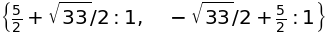

In [27]:
evals = M2.eigenvals()
evals

In [28]:
evals.values()

## 2 Exercises


### 2.1 Vector manipulation
* Q 2.1.1 - Define the two vectors
$$c = \begin{bmatrix} 
  \sin(\theta)\cos(\phi) \\
  \sin(\theta)\sin(\phi)\\
  \cos(\theta)
\end{bmatrix}
, 
o = \begin{bmatrix} 
  -\cos(\theta)\cos(\phi) \\
  -\cos(\theta)\sin(\phi)\\
  \sin(\theta)
\end{bmatrix}$$

In [29]:
theta,phi=symbols('theta,phi')
c=[sin(theta)*cos(phi),sin(theta)*sin(phi),cos(theta)]
#c=c.reshape(3,1)
#c = c.transpose()
print(c)

[sin(theta)*cos(phi), sin(phi)*sin(theta), cos(theta)]


In [30]:
o=[-cos(theta)*cos(phi),-cos(theta)*sin(phi),sin(theta)]
#o=o.reshape(3,1)
print(o)

[-cos(phi)*cos(theta), -sin(phi)*cos(theta), sin(theta)]


* Q 2.1.2 - Prove that these vectors are orthogonal 

In [32]:
dot_eq = np.dot(o, c)
#print(dot_eq.shape)
print(dot_eq)

-sin(phi)**2*sin(theta)*cos(theta) - sin(theta)*cos(phi)**2*cos(theta) + sin(theta)*cos(theta)


In [33]:
def func(the, ph):
    val = -np.sin(ph)**2*np.sin(the)*np.cos(the) - np.sin(the)*np.cos(ph)**2*np.cos(the) + np.sin(the)*np.cos(the)
    return val

In [34]:
func(np.pi/5, np.pi/2)


* Q2.1.3 - prove that their norm is 1

In [35]:
o_norm=sqrt(np.dot(o,o))
o_norm.simplify()
#c_norm=sqrt(np.dot(c,c))


In [36]:
c_norm=sqrt(np.dot(c,c))
c_norm.simplify()


* Q2.1.3 - Compute the third vector $b$ that is orthogonal to both $o$ and $c$

In [37]:
b=np.cross(c,o)
print b

[sin(phi)*sin(theta)**2 + sin(phi)*cos(theta)**2
 -sin(theta)**2*cos(phi) - cos(phi)*cos(theta)**2 0]


### 2.2 Basic matrices computation

Consider the following matrices:
$$
A = \begin{bmatrix} 
  -3 & 2 \\
   0 & 4\\
   1 & -1
\end{bmatrix}
, 
B = \begin{bmatrix} 
  1 & 2 \\
  0 & 1 \\
  1 & 1
\end{bmatrix}
$$
* Q 2.2.1 - Find a matrix $C$ such that $A-2B-C=0$
* Q 2.2.2 - Find a matrix $D$ such that $A+B+C+4D =0$

In [46]:
A=Matrix([[-3,2],[0,4],[1,-1]])
B=Matrix([[1,2],[0,1],[1,-1]])

In [47]:
C=A-2*B
C

⎡-5  -2⎤
⎢      ⎥
⎢0   2 ⎥
⎢      ⎥
⎣-1  1 ⎦

In [48]:
D=-0.25*(A+B+C)
D

⎡1.75   -0.5 ⎤
⎢            ⎥
⎢  0    -1.75⎥
⎢            ⎥
⎣-0.25  0.25 ⎦

### 2.3 Linear system 
Find the following linear system by first using solve and then using matrix representation.

$$
  \begin{cases}
    x_1 + 2x_2 + 3x_3 + 4x_4 &= 25,\\
    -x_2 + x_3 -x_4 &= 5,\\
    x_1 + 2x_2+ 2x_3 &= 20, \\
    2x_1 + 3x_3 &= 19
  \end{cases}
$$



In [49]:
x1,x2,x3,x4=symbols('x1,x2,x3,x4')

In [56]:
A=Matrix([[1,2,3,4],[0,-1,1,-1],[1,2,2,0],[2,0,3,0]])
A,A.shape

⎛⎡1  2   3  4 ⎤, (4, 4)⎞
⎜⎢            ⎥        ⎟
⎜⎢0  -1  1  -1⎥        ⎟
⎜⎢            ⎥        ⎟
⎜⎢1  2   2  0 ⎥        ⎟
⎜⎢            ⎥        ⎟
⎝⎣2  0   3  0 ⎦        ⎠

In [57]:
X=Matrix([[x1],[x2],[x3],[x4]])
X,X.shape

⎛⎡x₁⎤, (4, 1)⎞
⎜⎢  ⎥        ⎟
⎜⎢x₂⎥        ⎟
⎜⎢  ⎥        ⎟
⎜⎢x₃⎥        ⎟
⎜⎢  ⎥        ⎟
⎝⎣x₄⎦        ⎠

In [58]:
B=Matrix([[25],[5],[20],[19]])
B,B.shape

⎛⎡25⎤, (4, 1)⎞
⎜⎢  ⎥        ⎟
⎜⎢5 ⎥        ⎟
⎜⎢  ⎥        ⎟
⎜⎢20⎥        ⎟
⎜⎢  ⎥        ⎟
⎝⎣19⎦        ⎠

In [63]:
X=A.inv()*B
X

⎡ -2 ⎤
⎢    ⎥
⎢10/3⎥
⎢    ⎥
⎢23/3⎥
⎢    ⎥
⎣-2/3⎦

In [72]:
eq1 = Eq(x1+2*x2+3*x3+4*x4, 25)
eq2 = Eq(-x2+x3-x4, 5)
eq3 = Eq(x1+2*x2+2*x3, 20)
eq4 = Eq(2*x1+3*x3, 19)

linsolve([eq1, eq2, eq3, eq4], (x1, x2, x3, x4))

### 2.4 Commuting matrices 
In linear algebra, two matrices $A$ and $B$ are said to commute if $A.B = B.A$ and equivalently their commutator $A.B - B.A = 0$.
Find all the matrices that when commutes with matrix 
$A = 
\begin{bmatrix}
1 & 0 & 0 \\
0 & 3 & 0 \\
0 & 0 & 5
\end{bmatrix}
$
can be writen in the form of:
$$
B = \begin{bmatrix}
k_1  & 0 & 0 \\
0 & k_2 & 0 \\
0 & 0 & k_3
\end{bmatrix} , k_1, k_2, k_3 \in \rm I\!R
$$


In [73]:
A=Matrix([[1,0,0],[0,3,0],[0,0,5]])
A

⎡1  0  0⎤
⎢       ⎥
⎢0  3  0⎥
⎢       ⎥
⎣0  0  5⎦

In [74]:
a11,a12,a13,a21,a22,a23,a31,a32,a33=symbols('a11,a12,a13,a21,a22,a23,a31,a32,a33')
B=Matrix([[a11,a12,a13],[a21,a22,a23],[a31,a32,a33]])
B


⎡a₁₁  a₁₂  a₁₃⎤
⎢             ⎥
⎢a₂₁  a₂₂  a₂₃⎥
⎢             ⎥
⎣a₃₁  a₃₂  a₃₃⎦

In [77]:
M=A*B-B*A
M

⎡  0    -2⋅a₁₂  -4⋅a₁₃⎤
⎢                     ⎥
⎢2⋅a₂₁    0     -2⋅a₂₃⎥
⎢                     ⎥
⎣4⋅a₃₁  2⋅a₃₂     0   ⎦

In [79]:
linsolve(flatten(M), (a11, a12, a13, a21, a22, a23, a31, a32, a33))

### 2.5 Invertible matrix
For which values of $t$ the following matrix is not invertible: 
$$ A = 
\begin{bmatrix}
t+3 & -1 & 1\\
5 & t-3 & 2\\
6 & -6 & t+4 \\ 
\end{bmatrix}
$$

In [81]:
t=symbols('t')
A=Matrix([[t+3,-1,1],[5,t-3,2],[6,-6,t+4]])
A.det()

In [82]:
solve(A.det(),t)

### 2.6 Pseudo inverse of matrix

The pseudo-inverse of a $m\times n$ matrix $A$ is a generalization of a inverse matrix.
For an overdetermined set of linear equations represented by its matrix $A$ (with $m \ge n$),
if A is full column rank, meaning $rank(A) = n \le m$. Therefore, $A^{T}.A$ is not singular and the pseudo-inverse $A^{\dagger}$ is a left inverse of $A$, in the sense that $A^{\dagger}.A = In$
In this case we have the closed-form expresson $A^{\dagger} = (A^{T}. A)^{-1}.A^{T}$.
The solution to the least-squares problem $min_{x} \Vert Ax-y\Vert$, where the minimum norm is $x^{\ast} = A^{\dagger}.y$

Now consider the following linear systems, find the solution using least-square method:

$$
  \begin{cases}
    x+z & = 1.5\\
    x-y & =2.1\\
    x-z & = 0.8\\
    x+y & = 0.6
  \end{cases}
$$

In [83]:
A=Matrix([[1,0,1],[1,-1,0],[1,0,-1],[1,1,0]])
x,y,z=symbols('x,y,z')
b=Matrix([1.5,2.1,0.8,0.6])
X=Matrix([x,y,z])
X=X.transpose()
A,b,X

⎛⎡1  0   1 ⎤, ⎡1.5⎤, [x  y  z]⎞
⎜⎢         ⎥  ⎢   ⎥           ⎟
⎜⎢1  -1  0 ⎥  ⎢2.1⎥           ⎟
⎜⎢         ⎥  ⎢   ⎥           ⎟
⎜⎢1  0   -1⎥  ⎢0.8⎥           ⎟
⎜⎢         ⎥  ⎢   ⎥           ⎟
⎝⎣1  1   0 ⎦  ⎣0.6⎦           ⎠

In [84]:
(A.transpose()*A).inv()*A.transpose()*b

⎡1.25 ⎤
⎢     ⎥
⎢-0.75⎥
⎢     ⎥
⎣0.35 ⎦